<center>
    <h1>University of Canberra</h1>
    <h3>11482 - Pattern Recognition and Machine Learning</h3>
    <h3>Tutorial Class Thursday 0930 (Semester 2 / 2024)</h3>
    <h2>Unit Project Stage 2</h2>
    <h2>Group 101 (Individual)</h2>
    <h2>James McGuinness</h2>
    ______________________________________________________________________________________________________________________________________________________
</center>


# Part A

### Prerequisites and Libraries to import

In [2]:
# Pre-reqs and libraries to import
import sys
sys.path.append('C:\\Users\\James\\Desktop\\RoboticsJourney\\Self_Study\\1.PatternReg.ML\\introduction_to_ml_with_python')
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

## Preprocessing (Criteria B1)
Data set selection and description of dataset and features.  
Explain if any pre-processing would be required for the chosen dataset.  
Explain how the features would be used in model development. (Use any feedback from Assn1).  
(*10 pts*)

In [145]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [146]:
print(f"- Data set shape: {cancer.data.shape}")
print(f"- {len(cancer.data)} equals the number of samples")
print(f"- {len(cancer.feature_names)} equals the number of features per sample")
print(f"- Some Features names within a sample: {cancer.feature_names[:30]}")
print(f"- Some data values within a sample: {cancer.data[0, :4]}")
print(f"- The target class is either a one or zero: {cancer.target[0:20]}")
print(f"- The target class names are: {cancer.target_names}")
print("- Class Distribution: 212 - Malignant, 357 - Benign")
print("- Counts per Class:{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print(f"- The count of 0's is {np.count_nonzero(cancer.target == 0)} which represents Malignant")
print(f"- The count of 1's is {np.count_nonzero(cancer.target == 1)} which represents Benign")

#print(f"- There's no missing values{}")

- Data set shape: (569, 30)
- 569 equals the number of samples
- 30 equals the number of features per sample
- Some Features names within a sample: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
- Some data values within a sample: [  17.99   10.38  122.8  1001.  ]
- The target class is either a one or zero: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
- The target class names are: ['malignant' 'benign']
- Class Distribution: 212 - Malignant, 357 - Benign
- Counts per Class:{'malignant': 212

- I did discover that the 30 features are actually made up of three sets of the same ten measurements.
- Also that each of the 569 sample, are actually individual cells - each sample is the measurements of a single cell.
- Eg: a set of Mean measurement, a set of Standard Errror measurements and a set of worst measurements for a single cell.

In [129]:
import pandas as pd

# Get feature names and first row of data
features = cancer.feature_names
first_row_data = cancer.data[1]

# Create DataFrames for each set of 10 features and values
df1 = pd.DataFrame({
    'Mean': features[:10],
    'Values': first_row_data[:10]
})

df2 = pd.DataFrame({
    'Standard Error': features[10:20],
    'Values': first_row_data[10:20]
})

df3 = pd.DataFrame({
    'Worst': features[20:30],
    'Values': first_row_data[20:30]
})

# Concatenate DataFrames horizontally
df_combined = pd.concat([df1, df2, df3], axis=1)

# Display the combined DataFrame
df_combined


,Mean,Values,Standard Error,Values,Worst,Values
0,mean radius,20.57000,radius error,0.543500,worst radius,24.99000
1,mean texture,17.77000,texture error,0.733900,worst texture,23.41000
2,mean perimeter,132.90000,perimeter error,3.398000,worst perimeter,158.80000
3,mean area,1326.00000,area error,74.080000,worst area,1956.00000
4,mean smoothness,0.08474,smoothness error,0.005225,worst smoothness,0.12380
5,mean compactness,0.07864,compactness error,0.013080,worst compactness,0.18660
6,mean concavity,0.08690,concavity error,0.018600,worst concavity,0.24160
7,mean concave points,0.07017,concave points error,0.013400,worst concave points,0.18600
8,mean symmetry,0.18120,symmetry error,0.013890,worst symmetry,0.27500
9,mean fractal dimension,0.05667,fractal dimension error,0.003532,worst fractal dimension,0.08902


In [123]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Create a DataFrame for the feature data
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# Create a DataFrame for the target labels
labels_df = pd.DataFrame(cancer.target, columns=['label'])

# Map target values to labels
labels_df['label'] = labels_df['label'].map({0: '0 - Malignant', 1: '1 - Benign'})

# Select the specific columns for mean radius, radius SE, and worst radius
selected_columns = cancer_df[['mean radius', 'radius error', 'worst radius']]

# Concatenate the selected columns with the labels
result_df = pd.concat([selected_columns, labels_df], axis=1)

# Display the DataFrame with the mean radius, radius SE, worst radius, and label
result_df.head(20)


,mean radius,radius error,worst radius,label
0,17.99,1.0950,25.38,0 - Malignant
1,20.57,0.5435,24.99,0 - Malignant
2,19.69,0.7456,23.57,0 - Malignant
3,11.42,0.4956,14.91,0 - Malignant
4,20.29,0.7572,22.54,0 - Malignant
5,12.45,0.3345,15.47,0 - Malignant
6,18.25,0.4467,22.88,0 - Malignant
7,13.71,0.5835,17.06,0 - Malignant
8,13.00,0.3063,15.49,0 - Malignant
9,12.46,0.2976,15.09,0 - Malignant


## Visualisation (Criteria B2)
Dataset analysis, visualisation, feature correlation, insights extracted from data visualisation to be used for guiding model development.  
(*10 pts*)

- Eg: Bar graphs and histograms
- Eg: Boxplots
- Eg: Scatterplots - two variables - x input / y output - might be hard to understand re: 30 features times 14 = 420 scatter plots ref page 142
- Can you get one of those 4x4 scatter plots working for the breast scan dataset
- HeatMap / correlation matrix
- And what are the data types of the attributes?
- Can I get some statistics around the breast set?

In [ ]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='red', alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color='blue', alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

<Axes: xlabel='mean radius', ylabel='worst radius'>

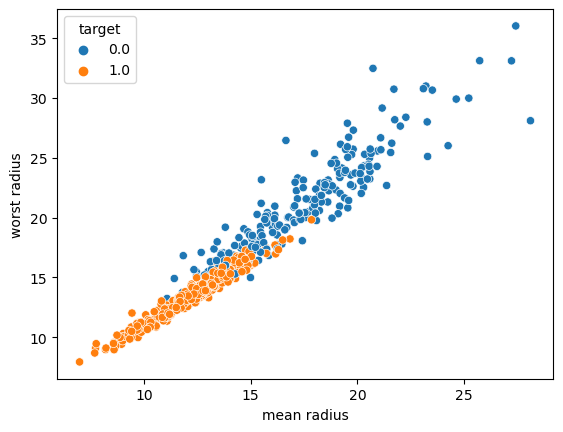

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_cancer = pd.DataFrame(np.c_[cancer['data'],cancer['target']], columns = np.append(cancer['feature_names'],['target']))
sns.scatterplot(x = 'mean radius', y = 'worst radius', hue = 'target', data = df_cancer)


## Data Preparation (Criteria B3) 
*(Scaling / PCA / preprocessing / cleaning)*  
Data preparation including transforms, scaling, re-shaping and any feature selection to reduce dimensionality.  
Summary of cleaned/pre-processed data ready for use for PRML model development.  
(*6 pts*)

- Prepare data
- Use data transforms / scaling / re-shaping
- Feature selection in order to reduce dimensionality 
- PCA
- Summarize data 

In [1]:
# Could do regularization here - ref page 61 with graph ic features and C parameter - L1 regularization penalty
# MinMaxScaler - page 134
# PCA on page 140 - with visualisation of all properties in a histogram on page 143
# PCA visual on page 145 - showing malignant and benign

## Model Selection (Criteria B4)
Selection of 3-4 PRML algorithms for the project that are most appropriate.  
How have you determined these to be most applicable?  
Explain your reasoning. (Use any feedback from Assignment 1).  
(*6 pts*)

- Decide which algorithms to use
- Explain my reasoning
- Select four algorithms to spot-check 
- Determine the best based on accuracy evaluations

In [47]:
# Decision tree ref page 75 
# I think SVM on page 100?
# Can I do some Polynomial Linear Regression here?
# Neural Networks on page 116 with heatmap

- Data cleaning? Missing values / outliers?
- Feature engineering
- Feature selection
- PCA and another thing called Recursive feature elimination 

In [1]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Define models to try
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC())
]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

In [ ]:
# Compare models using cross-validation
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")



In [12]:
# Example of hyperparameter tuning for the best model (let's say it's Random Forest)
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [13]:
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
print("Best parameters:", rf_grid.best_params_)
print("Best cross-validation score:", rf_grid.best_score_)

# Final model
best_model = rf_grid.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.9601094391244871


In [14]:
best_model

RandomForestClassifier(min_samples_split=5)

In [ ]:
# Example Code for accuracy_score, confusion_matrix, classification_report
# Train a kNN model and make predictions on the testing dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

In [17]:
# !! Check out
# W3_statements_for_Assignment.ipynb

## Accuracy Reports (Criteria B5)
Implement the selected algorithms and generate the accuracy report for spot-checking the algorithms.  
(*10 pts*)


6. **False Positive and False Negative**:
   - **False Positive**: Incorrectly predicts a positive outcome when the actual outcome is negative.
   - **False Negative**: Incorrectly predicts a negative outcome when the actual outcome is positive.
   - **Implications**: Varies based on the context, such as medical diagnoses or spam detection.

7. **Precision and Recall**:
   - **Precision**: Ratio of true positive predictions to the total positive predictions made. Indicates the accuracy of positive predictions.
   - **Recall**: Ratio of true positive predictions to the total actual positive cases. Measures the model's ability to identify positive cases correctly.
   - **Use**: Particularly useful in cases of class imbalance.

8. **F1 Score**:
   - **Definition**: The harmonic mean of precision and recall. Provides a balance between precision and recall, especially in imbalanced datasets.
   - **Formula**: $ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $

9. **Confusion Matrix and Correlation Matrix**:
   - **Confusion Matrix**: A table showing the performance of a classification model with counts of true positives, true negatives, false positives, and false negatives.
   - **Correlation Matrix**: A table displaying correlation coefficients between multiple variables, used to understand feature relationships.

10. **Classification Report**:
    - **Definition**: A summary of a classification model's performance, including precision, recall, F1-score, and support for each class.
    - **Purpose**: Provides a comprehensive view of model performance across different classes, accounting for true positives, false positives, and false negatives.


# References 
- https://www.saintjohnscancer.org/breast/breast-cancer/types-of-breast-cancer/

# Part B

1a. How are decision trees used for regression tasks different from those used for classification?  
*(5 pts)*

1b. How does a decision tree make predictions for new data points?  
(*5 pts*)

2a. What is the criterion being optimized by SVMs?  
(*5 pts*)

2b. How do SVMs handle the case of non-linearly separable data? What is the ‘kernel trick’, and why is it used in SVMs?  
(*5 pts*)

2c. How can SVMs be extended to handle multi-class classification problems?  
(*5 pts*)

3a. Dataset description – breast-cancer dataset (refer to the sklearn dataset on breast-cancer)  
(*5 pts*)

3b. What model parameters and hyperparameters are relevant to SVM-BC and used in the sklearn package SVM?  
How can they be tuned for optimisation?  
(*5 pts*)

3c. What are relevant kernel functions and how are they used in SVM learners?  
Which one have you selected for your implementation of SVM through sklearn?  
How have you decided the best kernel?
(*5 pts*)

3d. What do the parameters C, decision_function_shape=’ovr’, degree, gamma and kernel mean in the following SVM classifier call?  

SVC(C=1.0, cache_size=200, class_weight=None, coef0.0.0, decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

(*5 pts*)

3e. Implement the SVM-BC classifier for the breast-cancer dataset.  
Show the outcomes.  
(*8 pts*)

3f. Perform an accuracy analysis using a classification report for both the DecisionTree model and the SVM-BC model?  
Which model is better? Justify.  
(*5 pts*)

**End of document**